**3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:**

1. Data Exploration and Understanding:

Dataset Overview

In [1]:
#Dataset Overview:

#Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

#Path to the csv file
file_path='WHR-2024-5CS037.csv';
#Reading the csv to a panda dataframe
dataset=pd.read_csv(file_path)

#Printing the first 10 rows
print("The first 10 rows:")
print()
print(dataset.head(10))
print()

#Printing the number of rows and columns of the dataset
print("The number of rows and columns are:")
print()
print(dataset.shape)
print()

#Printing all the columns and their data types
print("All the columns and their data types are:")
print()
print(dataset.dtypes)
print()


The first 10 rows:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                   

Basic Statistics

In [2]:
#Basic Statistics:

#Calculating the mean, median and Standard deviation of the score column
mean= dataset['score'].mean()
median=dataset['score'].median()
standard_deviation=dataset['score'].std()

#Printing the mean, median and Standard deviation of the score column
print(f"Mean Score: {mean:.3f}")
print(f"Median Score: {median:.3f}")
print(f"Standard Deviation of Score: {standard_deviation:.3f}")
print()

#Calculating the country with the highest and lowest happiness score
high_happy_score=dataset.loc[dataset['score'].idxmax()]['Country name']
low_happy_score=dataset.loc[dataset['score'].idxmin()]['Country name']

#Printing the result
print("The country with the highest happiness score is:",high_happy_score)
print("The country with the lowest happiness score is:",low_happy_score)
print()


Mean Score: 5.528
Median Score: 5.785
Standard Deviation of Score: 1.171

The country with the highest happiness score is: Finland
The country with the lowest happiness score is: Afghanistan



In [3]:
#Missing Values:

missing_value=dataset.isnull().sum()
print("Missing value count for each column is:")
print()
print(missing_value)
print()

print("Colums like 'Log GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Dystopia + residual' have missing values. We will drop it.")
dataset = dataset.dropna(subset=['Log GDP per capita','Social support', 'Healthy life expectancy',
                                 'Freedom to make life choices', 'Generosity',
                                 'Perceptions of corruption', 'Dystopia + residual'])

missing_value=dataset.isnull().sum()
print("Missing value count after dropping missing values is:")
print()
print(missing_value)

Missing value count for each column is:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

Colums like 'Log GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Dystopia + residual' have missing values. We will drop it.
Missing value count after dropping missing values is:

Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


In [4]:
#Filtering and Sorting:

#Filtering the dataset to show countries with score greater than 7.5
score_gt_7=dataset[dataset['score']>7.5]
print("Countries with a Score greater than 7.5. is:")
print()
print(score_gt_7)
print()

#Sorting the dataset by Log GDP per capita
sort_GDP=score_gt_7.sort_values(by='Log GDP per capita', ascending=False)
print("\nGDP per Capita sorted in descending order is:")
print()
print(sort_GDP.head(10))
print()

Countries with a Score greater than 7.5. is:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


GDP per Capita sorted in descending order is:

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881

In [5]:
#Adding New Columns:

#Adding a new column Happiness Category that categorizes countries based on score into three categories
dataset['Happiness Category'] = ['Low' if score < 4 else 'Medium' if score <= 6 else 'High' for score in dataset['score']]
print(dataset[['Country name', 'score', 'Happiness Category']])


         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[140 rows x 3 columns]


<ipython-input-5-9c3a0d1fb25e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Happiness Category'] = ['Low' if score < 4 else 'Medium' if score <= 6 else 'High' for score in dataset['score']]


2. Data Visualizations:

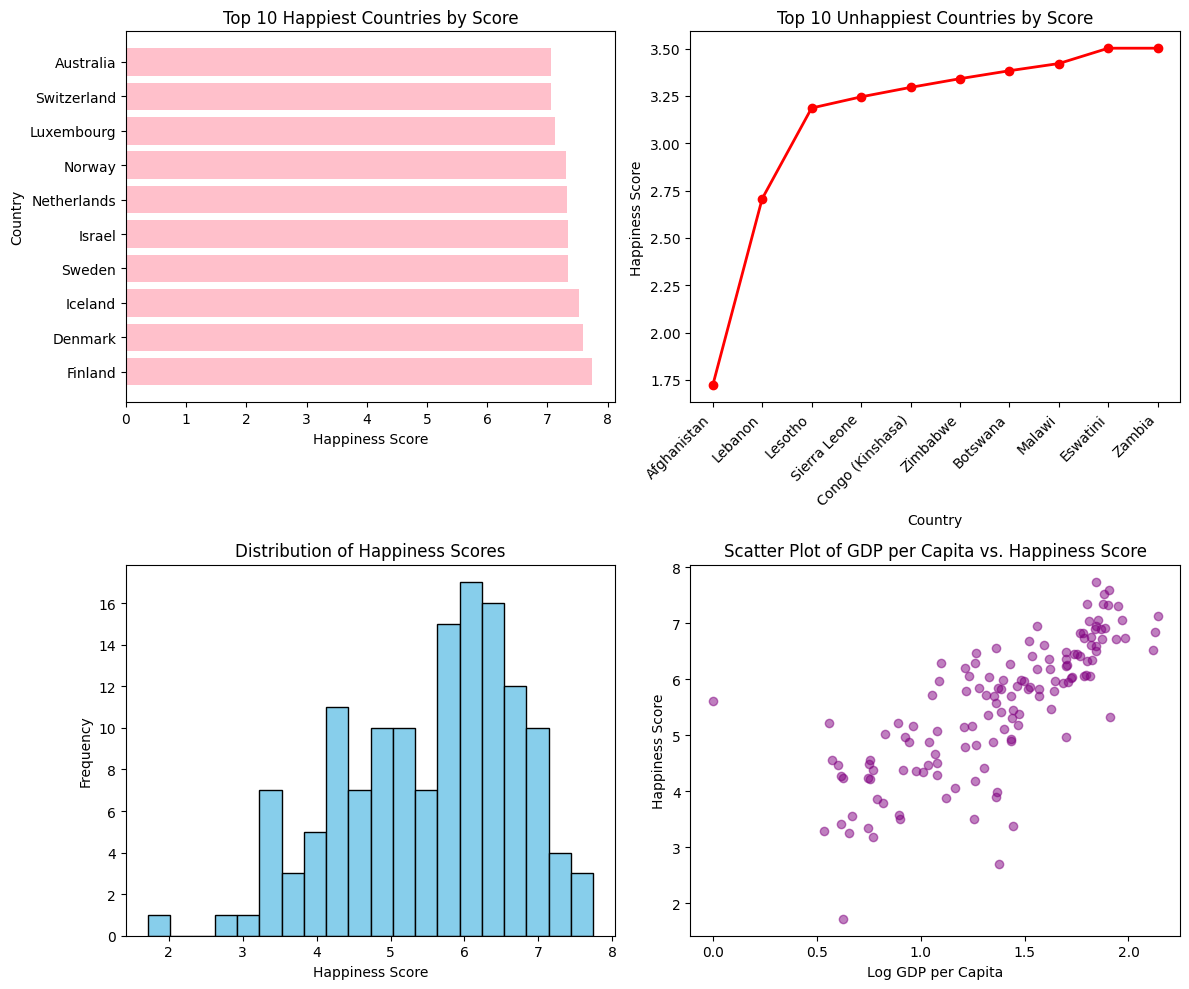

In [6]:
#Importing matplotlib
import matplotlib.pyplot as plt

#Sorting the score column for top 10 happiest country
top_10_happy = dataset.sort_values(by='score', ascending=False).head(10)

#Sorting the score column for top 10 unhappiest country
top_10_unhappy = dataset.sort_values(by='score').head(10)

# For plotting of 4 plots we are creating a 2x2 grid of plots
plt.figure(figsize=(12, 10))

# Bar Plott (Top 10 Happiest Countries)
plt.subplot(2, 2, 1)
plt.barh(top_10_happy['Country name'], top_10_happy['score'], color='pink')  # Horizontal bar chart
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries by Score')
# plt.legend(['Happiness Score'], loc='upper left')

# Line plot (Top 10 Unhappiest Countries)
plt.subplot(2, 2, 2)
plt.plot(top_10_unhappy['Country name'], top_10_unhappy['score'], marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45, ha='right') # Rotating the X-labels for clear view of the countries

# Histogram (Distribution of Happiness Scores)
plt.subplot(2, 2, 3)
plt.hist(dataset['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')

# Scatter plot (Scatter Plot of GDP vs Happiness)
plt.subplot(2, 2, 4)
plt.scatter(dataset['Log GDP per capita'], dataset['score'], color='purple', alpha=0.5)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of GDP per Capita vs. Happiness Score')

# Adjusting the layout
plt.tight_layout()


**3.2 Problem - 2 - Some Advance Data Exploration Task:**

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [7]:
#Creating a list which consists of south asian countries except maldives and bhutan
south_asian_countries = ["Afghanistan", "Bangladesh", "India", "Nepal", "Pakistan", "Sri Lanka"]

#Filtering the rows of the dataframe based on the values of the list
south_asian_data=dataset[dataset['Country name'].isin(south_asian_countries)]#Checks each value of the name column against the list and returns a boolean value

#Saving the filtered dataset
south_asian_data.to_csv('South Asia Happiness Data.csv', index=False)

#Printing the message
print("South Asia dataset successfully filtered and saved as South Asia Happiness Data.csv")


South Asia dataset successfully filtered and saved as South Asia Happiness Data.csv


Task - 2 - Composite Score Ranking:

The ranking of the south asian countries based on their composite score is:

  Country name  Composite Score
3    Sri Lanka           1.0739
0        Nepal           0.8159
2        India           0.7874
1     Pakistan           0.7039
4   Bangladesh           0.6774
5  Afghanistan           0.3238

The ranking based on the original score and composite score is as follows:

  Country name  Original Rank  Composite Rank
0        Nepal            1.0             2.0
1     Pakistan            2.0             4.0
2        India            3.0             3.0
3    Sri Lanka            4.0             1.0
4   Bangladesh            5.0             5.0
5  Afghanistan            6.0             6.0


For the visualization part, a scatter plot was made. The scatter plot compared the original rank(X-axis) and composite rank (Y-axis). 
The diagonal line in the plot represents a perfect alignment and points that deviate from the line indicates the differences between the two rankings.
The plot rev

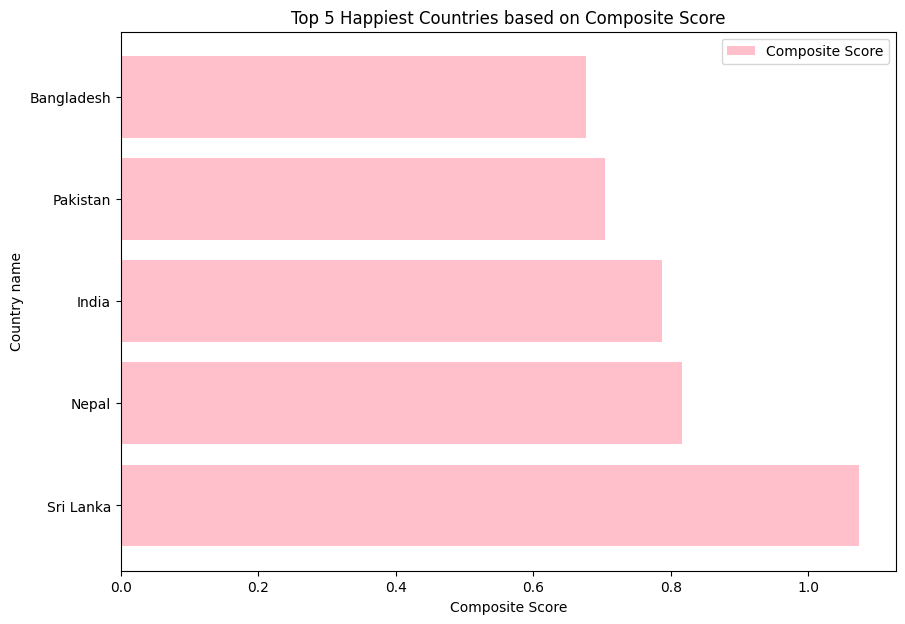

<Figure size 640x480 with 0 Axes>

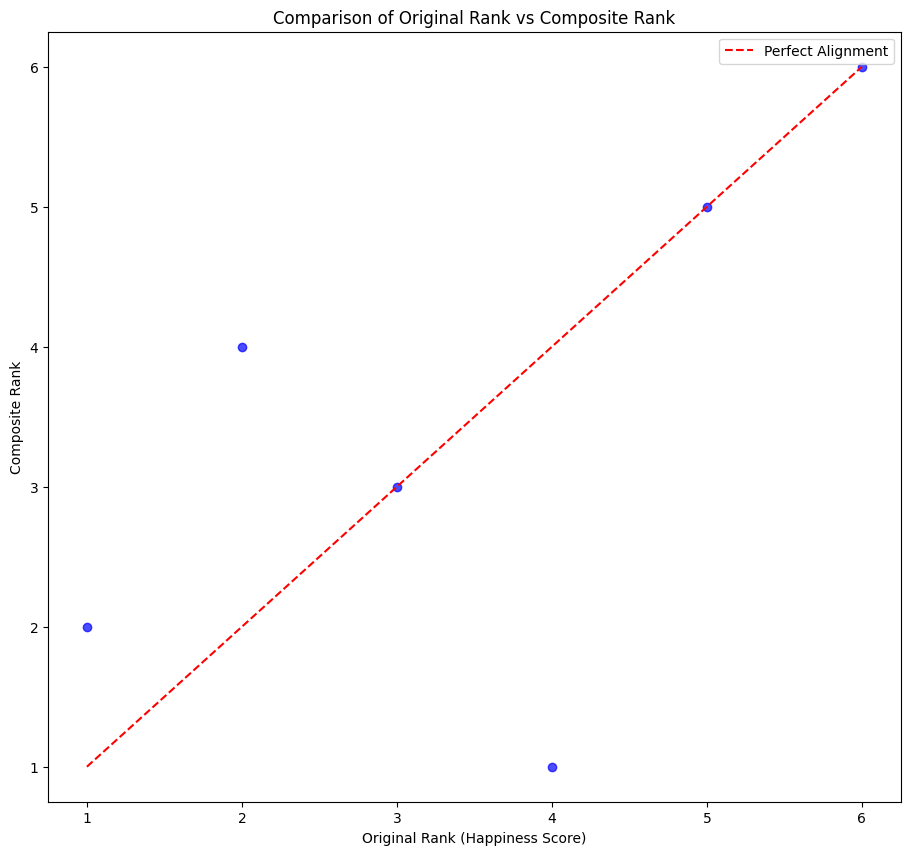

In [8]:
#Loading the south asia happiness data.csv
southAsian_data=pd.read_csv('South Asia Happiness Data.csv')

#Creating a new column Composite Score combining metrices such as Log GDP per capita, Social support and Healthy life expectancy
southAsian_data['Composite Score'] =(0.40 * southAsian_data['Log GDP per capita'] + 0.30 * southAsian_data['Social support'] + 0.30 * southAsian_data['Healthy life expectancy'])

#Ranking the south asian countries based on their composite data
south_data_ranked=southAsian_data.sort_values(by='Composite Score',ascending=False)

#Printing the ranked countries and their composite score
print("The ranking of the south asian countries based on their composite score is:")
print()
print(south_data_ranked[['Country name', 'Composite Score']])
print()

#Top 5 countries based on the composite data
top_5_south_data_ranked=southAsian_data.sort_values(by='Composite Score',ascending=False).head(5)

#Creating a horizontal bar showing the Composite Score
plt.figure(figsize=(10, 7))
plt.barh(top_5_south_data_ranked['Country name'], top_5_south_data_ranked['Composite Score'], color='pink')  # Horizontal bar chart
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.title('Top 5 Happiest Countries based on Composite Score')
# plt.gca().invert_yaxis()
plt.legend(['Composite Score'], loc='upper right')
plt.figure() #For space between two plot

#Creating a original rank column and assigning the ranked values of the score column to it
southAsian_data['Original Rank'] = southAsian_data['score'].rank(ascending=False )
#Creating a Composite Rank column and assigning the ranked values of the Composite Score column to it
southAsian_data['Composite Rank'] = southAsian_data['Composite Score'].rank(ascending=False)
#Displaying the'Country name', 'Original Rank', and 'Composite Rank' from the south asian data
print("The ranking based on the original score and composite score is as follows:")
print()
print(southAsian_data[['Country name', 'Original Rank', 'Composite Rank']])
print()

# Scatter plot to compare the rankings
plt.figure(figsize=(11, 10))
# plt.subplot(2, 1, 2)
plt.scatter(southAsian_data['Original Rank'], southAsian_data['Composite Rank'], color='blue', alpha=0.7)
plt.plot([1, len(southAsian_data)], [1, len(southAsian_data)], color='red', linestyle='--', label='Perfect Alignment')
plt.xlabel('Original Rank (Happiness Score)')
plt.ylabel('Composite Rank')
plt.title('Comparison of Original Rank vs Composite Rank')
plt.legend()
print()

print("For the visualization part, a scatter plot was made. The scatter plot compared the original rank(X-axis) and composite rank (Y-axis). \nThe diagonal line in the plot represents a perfect alignment and points that deviate from the line indicates the differences between the two rankings.")
print("The plot reveals that countries like India, Afghanistan and Bangladesh have aligned ranks whereas Nepal, Pakistan and Sri lanka has significant differences.")
print()


Task - 3 - Outlier Detection:

The outliner country based on their score is:

  Country name
5  Afghanistan

The outliner country based on their GDP is:

  Country name
5  Afghanistan


Characteristics of outliers and their potential impact on regional averages.

The outliers are the countries with exceptionally low or high GDP and score compared to the rest of the south asian countries. 
Outliers can skew the regional average for GDP and happiness score.
Thus, a country like Afghanistan with very low happiness and GDP may bring down the reginal average creating a bad image for the other south Asian countries.
On the contrary, a country like Sri Lanka with a high composite score or GDP could pull up the average for the region.



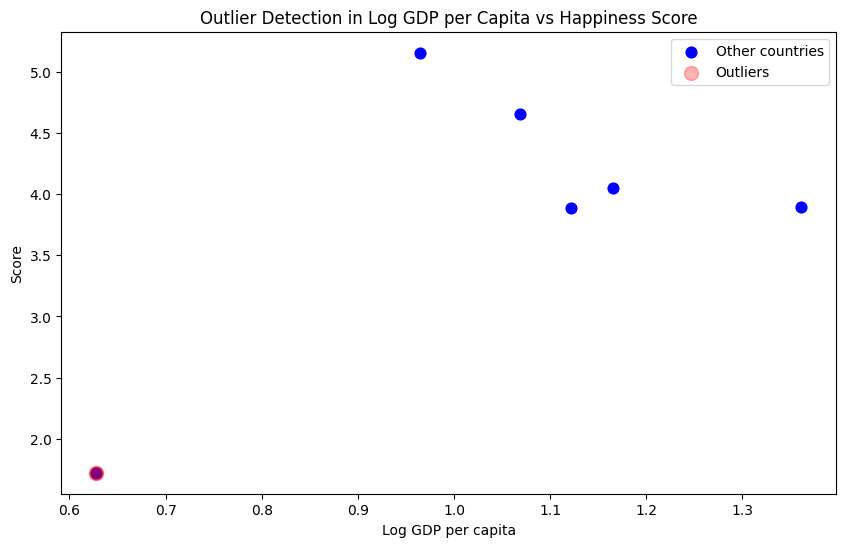

In [9]:
def outlier_country(dataset, column):
  '''
  Detects outliers in the specified column (Score and GDP per capita) based on the IQR method.

  The function calculates the lower and upper bounds using the IQR method to identify values that are significantly outside the expected range.

  Parameters:
  dataset: pandas.DataFrame
  The dataset containing the data for calculation.

  column: str
  The name of the column where the outliers need to be detected.

  Returns: The function returns a new dataframe containing the outliers.
  '''
  Q1=dataset[column].quantile(0.25) #Calculating the first quartile
  Q3=dataset[column].quantile(0.75) #Calculating the third quartile

  IQR=Q3-Q1 #Calculating the IQR

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  outliers=dataset[(dataset[column]<lower_bound) | (dataset[column]>upper_bound)]
  return outliers

#Calling the function on the score and GDP column
SA_score_outliers=outlier_country(southAsian_data, 'score')
SA_gdp_outliers=outlier_country(southAsian_data, 'Log GDP per capita')

#Combining the utliers from two of the column to one dataframe
outliers=pd.concat([SA_score_outliers, SA_gdp_outliers])

#Printing the outlier country for both the column
print("The outliner country based on their score is:")
print()
print(SA_score_outliers[['Country name']])
print()
print("The outliner country based on their GDP is:")
print()
print(SA_gdp_outliers[['Country name']])
print()

#Plotting a scatter plot with GDP on x-axis and Score on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(southAsian_data['Log GDP per capita'], southAsian_data['score'], color='blue', label='Other countries', s=60)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', s=100, alpha=0.3)
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Outlier Detection in Log GDP per Capita vs Happiness Score')
plt.legend()
print()

#Discussing the characteristics of outliers and their impact on regional averages
print("Characteristics of outliers and their potential impact on regional averages.")
print()
print("The outliers are the countries with exceptionally low or high GDP and score compared to the rest of the south asian countries. \nOutliers can skew the regional average for GDP and happiness score.")
print("Thus, a country like Afghanistan with very low happiness and GDP may bring down the reginal average creating a bad image for the other south Asian countries.\nOn the contrary, a country like Sri Lanka with a high composite score or GDP could pull up the average for the region.")
print()

Task - 4 - Exploring Trends Across Metrics:

Pearson Correlation between Freedom to Make Life Choices and Happiness Score:
0.8005

Pearson Correlation between Generosity and Happiness Score:
0.8745


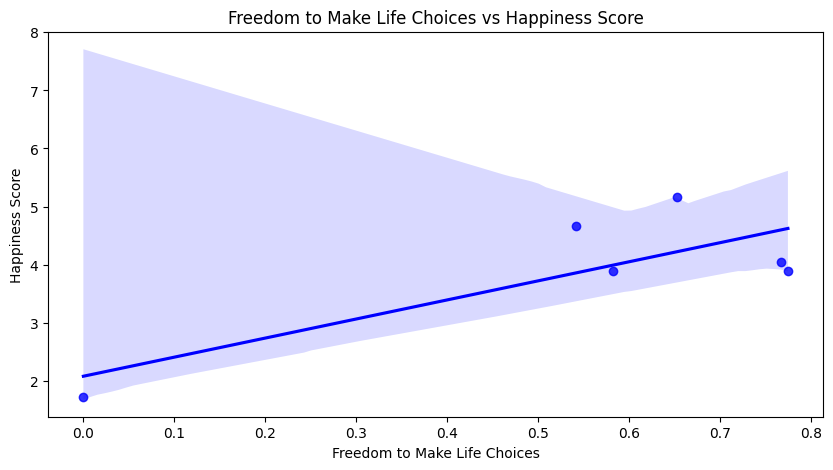

<Figure size 640x480 with 0 Axes>

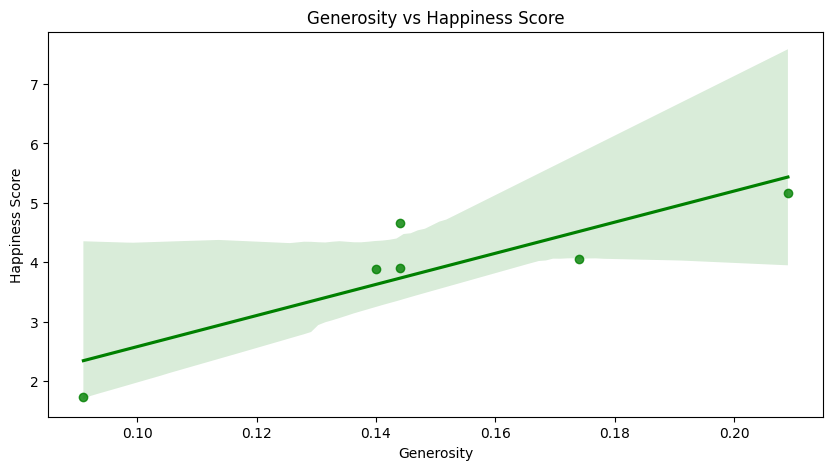


The strongest and weakest realtionship between the two metrices and Score is:

Pearson correlation(denoted by r) is a statistical measure used to evaluate the strength of the relationship between different variables.
The value of |r| when close to 1 represent a strong relation whereas when its closer to 0 it shows weak relation.
So observing the value of Pearson correlation for our data we can see that: 

The Pearson Correlation between Generosity and Happiness Score is 0.8745 which indicates a strong relation between the two. This means that countries where people show greater generosity such as helping tend to have higher happiness scores. 
Pearson Correlation between Freedom to Make Life Choices and Happiness Score is 0.8005 which is still good but a little less compared to generosity. This result implies that ability to make choices greatly influences happiness. 


In [10]:
#Importing seaborn
import seaborn as sns

#Calculating correlation of "Freedom to make life choices" with "Score"
SA_freedom_corr_score=southAsian_data['Freedom to make life choices'].corr(southAsian_data['score'])

#Calculating correlation of "Generosity" with "Score"
SA_generosity_corr_score=southAsian_data['Generosity'].corr(southAsian_data['score'])

#Printing the result
print("Pearson Correlation between Freedom to Make Life Choices and Happiness Score:")
print(f"{SA_freedom_corr_score:.4f}")
#Printing the result
print("\nPearson Correlation between Generosity and Happiness Score:")
print(f"{SA_generosity_corr_score:.4f}")

#Plotting a scatter plot for Freedom to Make Life Choices and Happiness Score
plt.figure(figsize=(10, 5))
sns.regplot(x='Freedom to make life choices', y='score', data=southAsian_data, color='blue')
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()
plt.tight_layout()

#Plotting a scatter plot for Generosity and Happiness Score
plt.figure(figsize=(10, 5))
sns.regplot(x='Generosity', y='score', data=southAsian_data, color='green')
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()
print()

#Identifying the strongest and weakest realtionship between the two metrices and Score
print("The strongest and weakest realtionship between the two metrices and Score is:")
print()
print("Pearson correlation(denoted by r) is a statistical measure used to evaluate the strength of the relationship between different variables.")
print("The value of |r| when close to 1 represent a strong relation whereas when its closer to 0 it shows weak relation.")
print("So observing the value of Pearson correlation for our data we can see that: ")
print("\nThe Pearson Correlation between Generosity and Happiness Score is 0.8745 which indicates a strong relation between the two. This means that countries where people show greater generosity such as helping tend to have higher happiness scores. " )
print("Pearson Correlation between Freedom to Make Life Choices and Happiness Score is 0.8005 which is still good but a little less compared to generosity. This result implies that ability to make choices greatly influences happiness. ")

****

Task - 5 - Gap Analysis:

  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
5  Afghanistan         -1.093

Ranking of South Asian countries by GDP-Score Gap (Ascending):

  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093


Ranking of South Asian countries by GDP-Score Gap (Descending):

  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193

The largest positive gap is:

  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764

The largest negative gap is:

  Country name  GDP-Score Gap
0        Nepal         -4.

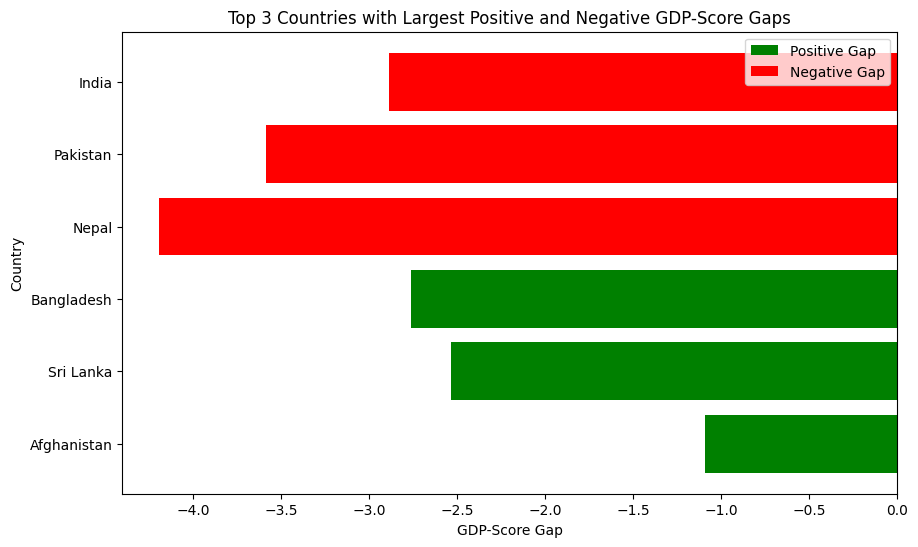

In [21]:
#Adding a new column GDP-Score Gap which contains the difference between GDP per Capita and the Score
southAsian_data['GDP-Score Gap']=southAsian_data['Log GDP per capita']-southAsian_data['score']
print(southAsian_data[['Country name','GDP-Score Gap']])
print()

#Ranking the country in ascending order by the gap
ascending_ranking = southAsian_data.sort_values(by='GDP-Score Gap')
print("Ranking of South Asian countries by GDP-Score Gap (Ascending):")
print()
print(ascending_ranking[['Country name', 'GDP-Score Gap']])
print()

#Ranking the country in descending order by the gap
descending_ranking =southAsian_data.sort_values(by='GDP-Score Gap', ascending=False)
print("\nRanking of South Asian countries by GDP-Score Gap (Descending):")
print()
print(descending_ranking[['Country name', 'GDP-Score Gap']])
print()

#Highlighting the top 3 countries with the largest positive gaps
largest_positive_gap = southAsian_data.sort_values(by='GDP-Score Gap',ascending=False).head(3)
#Highlighting the top 3 countries with the largest negative gaps
largest_negative_gap = southAsian_data.sort_values(by='GDP-Score Gap').head(3)

print("The largest positive gap is:")
print()
print(largest_positive_gap[['Country name', 'GDP-Score Gap']])
print()
print("The largest negative gap is:")
print()
print(largest_negative_gap[['Country name', 'GDP-Score Gap']])

combined_gaps = pd.concat([largest_positive_gap, largest_negative_gap])

# Plotting the combined chart with different colors for positive and negative gaps
plt.figure(figsize=(10, 6))

# Bar plot for negative gaps (red)
bars_negative = plt.barh(combined_gaps['Country name'][:3], combined_gaps['GDP-Score Gap'][:3], color='green')

# Bar plot for positive gaps (green)
bars_positive = plt.barh(combined_gaps['Country name'][3:], combined_gaps['GDP-Score Gap'][3:], color='red')

# Adding labels and title
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')

# Add legend
plt.legend([bars_negative, bars_positive], ['Positive Gap', 'Negative Gap'], loc='upper right')
print()


**3.3 Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Descriptive Statistics:

In [12]:
#Creating a list which consists of Middle East countries
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
#Filtering the rows of the dataframe based on the values of the list
middleEast_data=dataset[dataset['Country name'].isin(middle_east_countries)]#Checks each value of the name column against the list and returns a boolean value

# print(middleEast_data)

#Calculating mean and std of score of south asian countries
south_asia_mean=southAsian_data['score'].mean()
south_asia_std=southAsian_data['score'].std()

#Calculating mean and std of middle east countries
middle_east_mean=middleEast_data['score'].mean()
middle_east_std=middleEast_data['score'].std()

#Printing the data
print("South Asia:")
print(f"Mean Happiness Score: {south_asia_mean:.2f}")
print(f"Standard Deviation: {south_asia_std:.2f}")
print()
print("Middle East:")
print(f"Mean Happiness Score: {middle_east_mean:.2f}")
print(f"Standard Deviation: {middle_east_std:.2f}")


if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has a higher average Happiness Score than the Middle East.")
else:
    print("\nThe Middle East has a higher average Happiness Score than South Asia.")



South Asia:
Mean Happiness Score: 3.90
Standard Deviation: 1.18

Middle East:
Mean Happiness Score: 5.35
Standard Deviation: 1.65

The Middle East has a higher average Happiness Score than South Asia.


Top and Bottom Performers:

South Asia:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


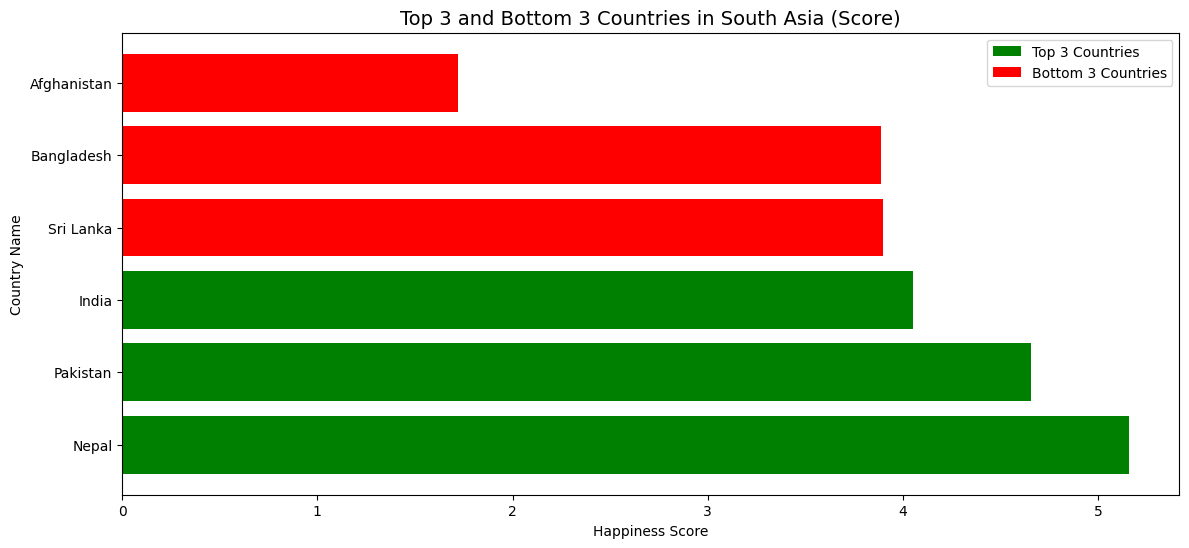

<Figure size 640x480 with 0 Axes>

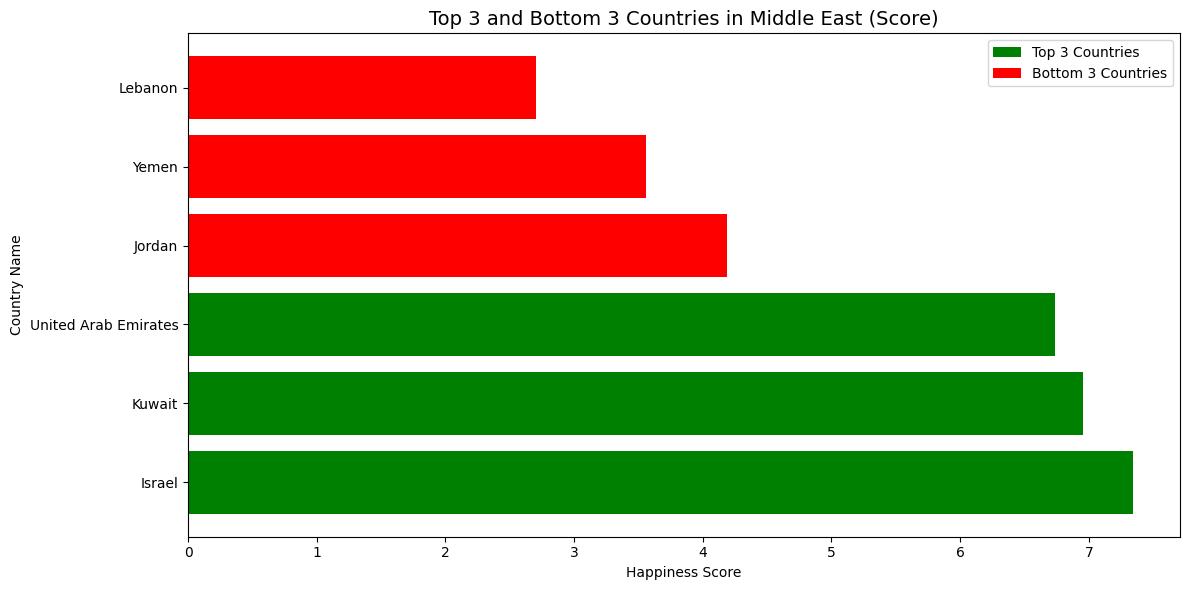

In [23]:
#Calculating the top 3 and bottom 3 countries in South Asia
top_three_south_asia=southAsian_data.sort_values(by='score', ascending=False).head(3)
bottom_three__south_asia=southAsian_data.sort_values(by='score').head(3)

#Calculating the top 3 and bottom 3 countries in Middle East
top_three_middle_east=middleEast_data.sort_values(by='score',ascending=False).head(3)
bottom_three_middle_east=middleEast_data.sort_values(by='score').head(3)

print("South Asia:")
print(top_three_south_asia[['Country name','score']])
print()
print(bottom_three__south_asia[['Country name','score']])
print()
print("Middle East:")
print(top_three_middle_east[['Country name','score']])
print()
print(bottom_three_middle_east[['Country name','score']])

#Plotting a bar for South Asia
plt.figure(figsize=(13.64, 6))
bars_top = plt.barh(southAsian_data['Country name'][:3], southAsian_data['score'][:3], color='green', label='Top 3 Countries')
bars_bottom = plt.barh(southAsian_data['Country name'][3:], southAsian_data['score'][3:], color='red', label='Bottom 3 Countries')
plt.title("Top 3 and Bottom 3 Countries in South Asia (Score)", fontsize=14)
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")
plt.legend(loc='upper right')
plt.tight_layout

plt.figure()

#Plotting a bar for Middle East
plt.figure(figsize=(12, 6))
bars_top = plt.barh(middleEast_data['Country name'][:3], middleEast_data['score'][:3], color='green', label='Top 3 Countries')
bars_bottom = plt.barh(middleEast_data['Country name'][-3:], middleEast_data['score'][-3:], color='red', label='Bottom 3 Countries')
plt.title("Top 3 and Bottom 3 Countries in Middle East (Score)", fontsize=14)
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")
plt.legend(loc='upper right')
plt.tight_layout()


Metric Comparisons:

The largest disparity is in 'Social Support' with a difference of 0.54



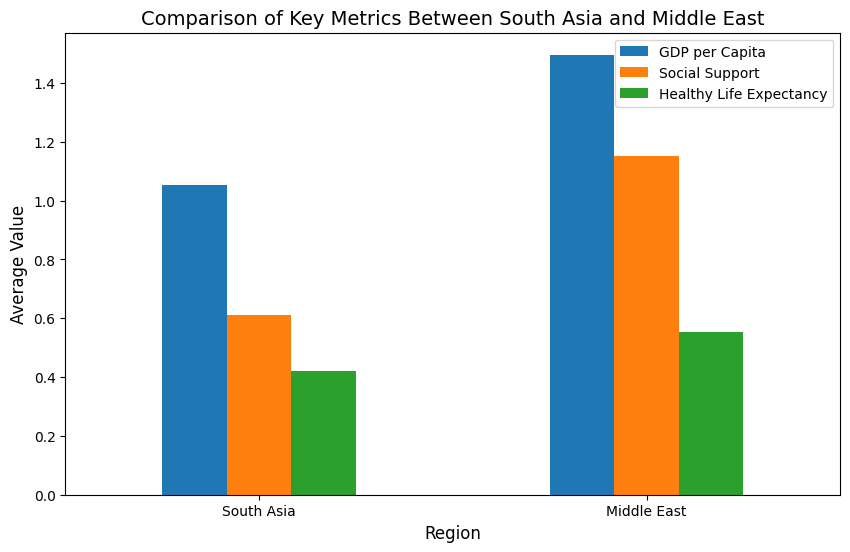

In [14]:
#Calculating the mean of three key metrices in a form of dictionary
south_asia_avg = {
    'GDP per Capita': southAsian_data['Log GDP per capita'].mean(),
    'Social Support': southAsian_data['Social support'].mean(),
    'Healthy Life Expectancy': southAsian_data['Healthy life expectancy'].mean()
}

middle_east_avg = {
    'GDP per Capita': middleEast_data['Log GDP per capita'].mean(),
    'Social Support': middleEast_data['Social support'].mean(),
    'Healthy Life Expectancy': middleEast_data['Healthy life expectancy'].mean()
}

# Creating a DataFrame for the comparison
# pd.DataFrame() creates the table by passing a dictionary where each key represents a column name and each value represents the list of corresponding values for the two regions.
comparison_df = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'GDP per Capita': [south_asia_avg['GDP per Capita'], middle_east_avg['GDP per Capita']],
    'Social Support': [south_asia_avg['Social Support'], middle_east_avg['Social Support']],
    'Healthy Life Expectancy': [south_asia_avg['Healthy Life Expectancy'], middle_east_avg['Healthy Life Expectancy']]
})

# Setting the region as the index for South Asia and Middle East
comparison_df.set_index('Region', inplace=True)

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=0)  # Keep the region names horizontal

# Calculating the differences between South Asia and Middle East for each metric
gdp_diff = abs(south_asia_avg['GDP per Capita'] - middle_east_avg['GDP per Capita'])
ss_diff = abs(south_asia_avg['Social Support'] - middle_east_avg['Social Support'])
hle_diff = abs(south_asia_avg['Healthy Life Expectancy'] - middle_east_avg['Healthy Life Expectancy'])

if gdp_diff >= ss_diff and gdp_diff >= hle_diff:
    largest_disparity_metric = 'GDP per Capita'
    largest_disparity_value = gdp_diff
elif ss_diff >= gdp_diff and ss_diff >= hle_diff:
    largest_disparity_metric = 'Social Support'
    largest_disparity_value = ss_diff
else:
    largest_disparity_metric = 'Healthy Life Expectancy'
    largest_disparity_value = hle_diff

print(f"The largest disparity is in '{largest_disparity_metric}' with a difference of {largest_disparity_value:.2f}")
print()


Happiness Disparity:

In [15]:
# Calculating Range for South Asia
south_asia_range = southAsian_data['score'].max() - southAsian_data['score'].min()

# Calculatting Range for Middle East
middle_east_range = middleEast_data['score'].max() - middleEast_data['score'].min()

#Already calculated the south asia mean and std
# Calculate Coefficient of Variation (CV) for South Asia
south_asia_cv = (south_asia_std / south_asia_mean)

#Already calculated the Middle East mean and std
# Calculate Coefficient of Variation (CV) for Middle East
middle_east_cv = (middle_east_std / middle_east_mean)

# Print Results
print(f"South Asia Range: {south_asia_range:.2f}")
print()
print(f"Middle East Range: {middle_east_range:.2f}")
print()
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv:.2f}%")
print()
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv:.2f}%")
print()

# Determining which region has greater variability in happiness
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia Range: 3.44

Middle East Range: 4.63

South Asia Coefficient of Variation (CV): 0.30%

Middle East Coefficient of Variation (CV): 0.31%

Middle East has greater variability in happiness.


Correlation Analysis:

South Asia - Freedom to Make Life Choices and Score Correlation: 0.801

South Asia - Generosity and Score Correlation: 0.875

Middle East - Freedom to Make Life Choices and Score Correlation: 0.863

Middle East - Generosity and Score Correlation: 0.628



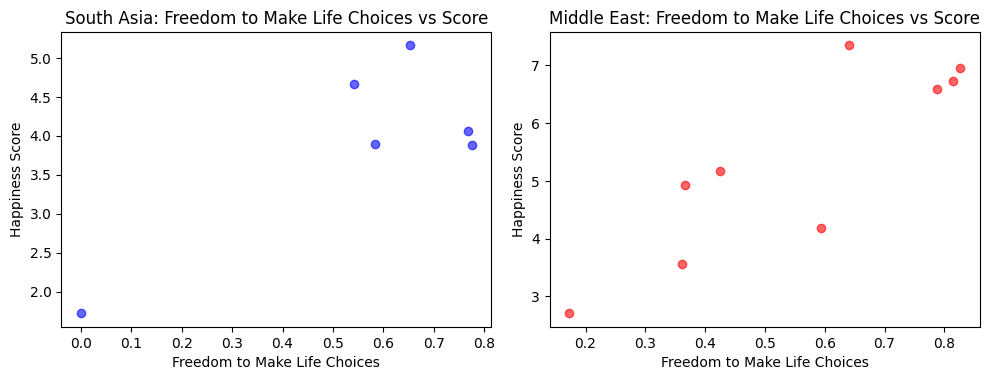

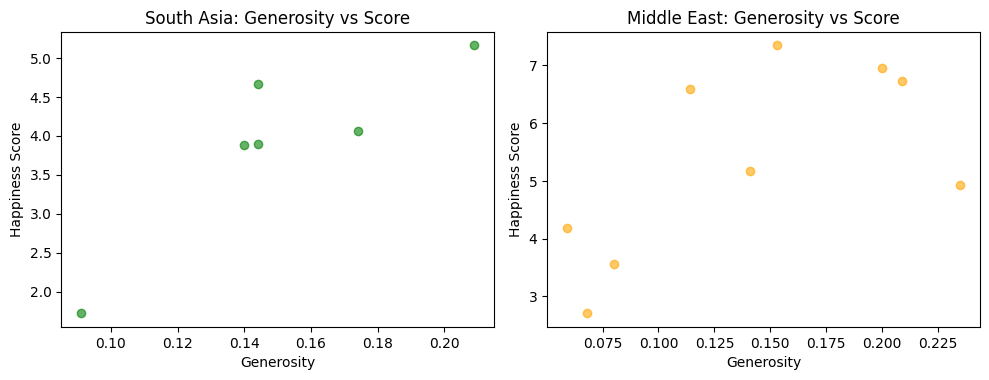

In [29]:
#Correlation of Score with Freedom to Make Life Choices, and Generosity of South Asia already calcualted

#Calculating the correlation of Score with Freedom to Make Life Choices, and Generosity of Middle East
ME_freedom_corr_score = middleEast_data['Freedom to make life choices'].corr(middleEast_data['score'])
ME_generosity_corr_score = middleEast_data['Generosity'].corr(middleEast_data['score'])

#Printing the data
print(f"South Asia - Freedom to Make Life Choices and Score Correlation: {SA_freedom_corr_score:.3f}")
print()
print(f"South Asia - Generosity and Score Correlation: {SA_generosity_corr_score:.3f}")
print()
print(f"Middle East - Freedom to Make Life Choices and Score Correlation: {ME_freedom_corr_score:.3f}")
print()
print(f"Middle East - Generosity and Score Correlation: {ME_generosity_corr_score:.3f}")
print()

#Plotting 4 plots for metrics Freedom to Make Life Choices, and Generosity within South Asia and Middle East
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.scatter(southAsian_data['Freedom to make life choices'], southAsian_data['score'], color='blue', alpha=0.6)
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')


plt.subplot(2, 2, 2)
plt.scatter(middleEast_data['Freedom to make life choices'], middleEast_data['score'], color='red', alpha=0.6)
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.tight_layout()

plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 3)
plt.scatter(southAsian_data['Generosity'], southAsian_data['score'], color='green', alpha=0.6)
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.subplot(2, 2, 4)
plt.scatter(middleEast_data['Generosity'], middleEast_data['score'], color='orange', alpha=0.6)
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.tight_layout()

Outlier Detection:

The score and GDP outliers for South Asia is:
  Country name
5  Afghanistan
  Country name
5  Afghanistan

The score and GDP outliers for Middle East is:
Empty DataFrame
Columns: [Country name]
Index: []
Empty DataFrame
Columns: [Country name]
Index: []

The outliers in South Asia is Afghanistan for both Score and Log GDP per capita.
The result shows that there is no outliner country in Middle East


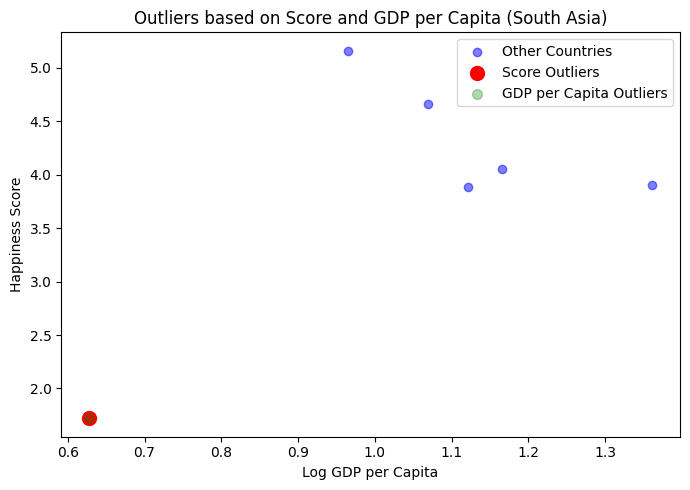

<Figure size 640x480 with 0 Axes>

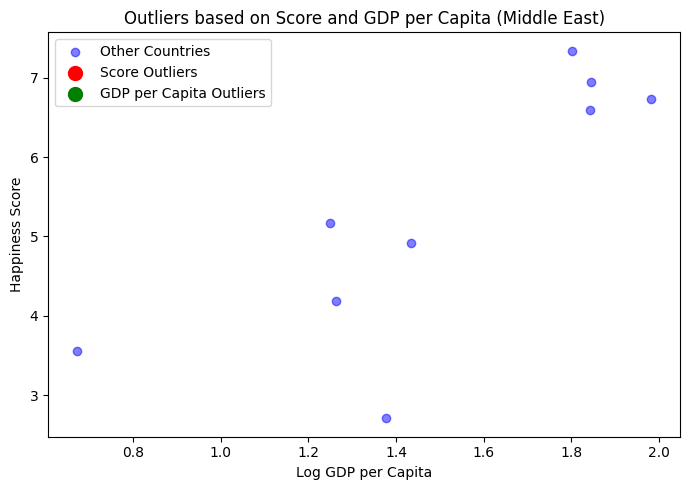

In [17]:
#The outliers for South Asia already calculated

#Calculating the outliers for the Middle East by calling function "outlier_country"
ME_score_outliers = outlier_country(middleEast_data, 'score')
ME_gdp_outliers = outlier_country(middleEast_data, 'Log GDP per capita')

#The result shows that there is no outliner country in Middle East

#Printing the result
print("The score and GDP outliers for South Asia is:")
print(SA_score_outliers[["Country name"]])
print(SA_gdp_outliers[["Country name"]])
print()
print("The score and GDP outliers for Middle East is:")
print(ME_score_outliers[["Country name"]])
print(ME_gdp_outliers[["Country name"]])
print()
print("The outliers in South Asia is Afghanistan for both Score and Log GDP per capita.")



plt.figure(figsize=(7, 5))
plt.scatter(southAsian_data['Log GDP per capita'], southAsian_data['score'], color='blue', alpha=0.5, label='Other Countries')
plt.scatter(SA_score_outliers['Log GDP per capita'], SA_score_outliers['score'], color='red', label='Score Outliers', s=100)
plt.scatter(SA_gdp_outliers['Log GDP per capita'], SA_gdp_outliers['score'], color='green', label='GDP per Capita Outliers', s=50, alpha=0.3)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outliers based on Score and GDP per Capita (South Asia)')
plt.legend()
plt.tight_layout()

plt.figure()

#Plotting the outliers for Middle East based on Score and GDP per Capita
print("The result shows that there is no outliner country in Middle East")
plt.figure(figsize=(7, 5))
plt.scatter(middleEast_data['Log GDP per capita'], middleEast_data['score'], color='blue', alpha=0.5, label='Other Countries')
plt.scatter(ME_score_outliers['Log GDP per capita'], ME_score_outliers['score'], color='red', label='Score Outliers', s=100)
plt.scatter(ME_gdp_outliers['Log GDP per capita'], ME_gdp_outliers['score'], color='green', label='GDP per Capita Outliers', s=100)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outliers based on Score and GDP per Capita (Middle East)')
plt.legend()
plt.tight_layout()

Visualization:


For the South Asia, the median is closer to the bottom which indicates the median score is relatively low, suggesting many South Asian countries have lower scores.
South Asia also has short whiskers which indicates low variability in scores. There is a dot at the bottom of the box which represents Afghanistan which is an outlier.
This enforces that Afghanistan is set apart from its neighbors due to various issues.

On the other hand, the box plot for Middle East is taller and whisker extends farther showing variability in the scores.
There is also no dot at the bottom which means there is the absence of outliers which indicates that even though the scores are spread out, they fall within an expected range.
Also, the median score of the Middle East is higher which means that the countries of Middle East have high happiness scores.



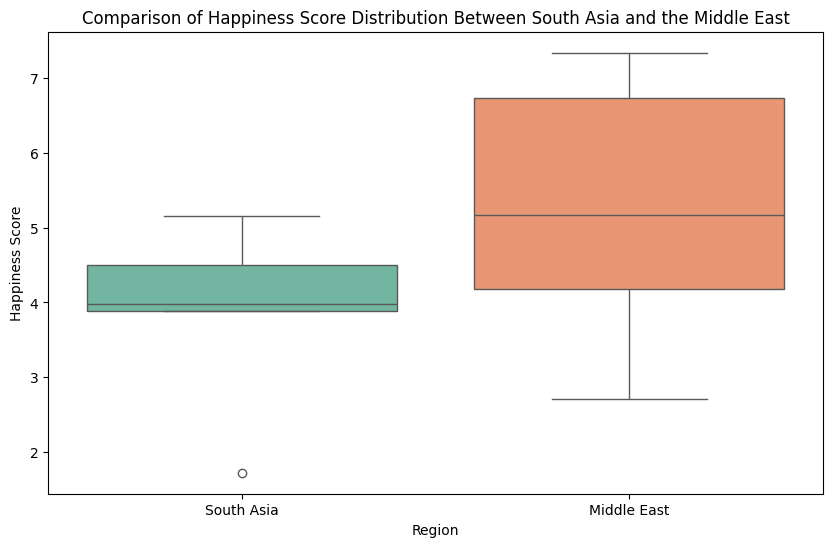

In [37]:
# Add a 'Region' column to distinguish the regions
southAsian_data.loc[:, 'Region'] = 'South Asia'
middleEast_data.loc[:, 'Region'] = 'Middle East'

# Combine both dataframes
combined_data = pd.concat([southAsian_data[['Country name', 'score', 'Region']],
                           middleEast_data[['Country name', 'score', 'Region']]])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', hue='Region', data=combined_data, palette='Set2')

# Add titles and labels
plt.title('Comparison of Happiness Score Distribution Between South Asia and the Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')

print()
print("For the South Asia, the median is closer to the bottom which indicates the median score is relatively low, suggesting many South Asian countries have lower scores.")
print("South Asia also has short whiskers which indicates low variability in scores. There is a dot at the bottom of the box which represents Afghanistan which is an outlier.")
print("This enforces that Afghanistan is set apart from its neighbors due to various issues.")
print()

print("On the other hand, the box plot for Middle East is taller and whisker extends farther showing variability in the scores.")
print("There is also no dot at the bottom which means there is the absence of outliers which indicates that even though the scores are spread out, they fall within an expected range.")
print("Also, the median score of the Middle East is higher which means that the countries of Middle East have high happiness scores.")
print()